# Projeto Final para Ciência de Dados
## El nino
### Realizado por grupo 11
***Aprendizagem Supervisionada***

Catarina Brito nº98521 | Pedro Melo nº99160 | Tomás Aldeia nº 99780

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from datetime import datetime # alterar tipo string para date ?
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn import tree
from mpl_toolkits.basemap import Basemap

## Ler dataset

In [3]:
clean = pd.read_csv('/Users/catarinabrito/Desktop/LCD/Segundo_Ano/Segundo_Semestre/Projeto/TRABALHO/BD/Previous.csv')

In [4]:
clean1 = clean.drop(['obs','year','month','day','date'],1)
clean2 = clean.drop(['obs','month','day','date'],1)

C:\Users\PEDROM~1\AppData\Local\Temp/ipykernel_9328/1658055997.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean1 = clean.drop(['obs','year','month','day','date'],1)
C:\Users\PEDROM~1\AppData\Local\Temp/ipykernel_9328/1658055997.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean2 = clean.drop(['obs','month','day','date'],1)


## Data Preparation

### MULTICOLINARIEDADE
Com todas numéricas

In [148]:
# verificar e remover multicolinearidade (caso exista)
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = clean1[['latitude','longitude','zon_winds','mer_winds','air_temp','humidity']]

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

     feature         VIF
0   latitude    1.053778
1  longitude    1.323007
2  zon_winds    4.728995
3  mer_winds    2.847078
4   air_temp  114.571494
5   humidity  122.263282


**Conclusão** 
- Multicolinariedade entre humidade e temperatura do ar

**1. Testar multicolinariedade com apenas temperatura do ar**

In [149]:
# verificar e remover multicolinearidade (caso exista)
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = clean1[['latitude','longitude','zon_winds','mer_winds','air_temp']]

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

     feature       VIF
0   latitude  1.050347
1  longitude  1.273171
2  zon_winds  4.589519
3  mer_winds  2.787957
4   air_temp  6.302033


**2. Testar multicolinariedade com apenas humidity**

In [150]:
# verificar e remover multicolinearidade (caso exista)
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = clean1[['latitude','longitude','zon_winds','mer_winds','humidity']]

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

     feature       VIF
0   latitude  1.051302
1  longitude  1.259656
2  zon_winds  4.728792
3  mer_winds  2.846982
4   humidity  6.725121


#### Solução para problema de multicolinariedade
- Criar 2 dataset um com humidity e outro com temperatura do ar

In [151]:
air = clean1.drop(['humidity'],1)

/var/folders/4f/7k81zvl55vn3c2nm1104whpc0000gn/T/ipykernel_88168/331682176.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  air = clean1.drop(['humidity'],1)


In [152]:
hum = clean1.drop(['air_temp'],1)

/var/folders/4f/7k81zvl55vn3c2nm1104whpc0000gn/T/ipykernel_88168/3544612283.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hum = clean1.drop(['air_temp'],1)


### Definição de Dummies, estações do ano e ventos

1. Temperatura do ar

In [153]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
one_hot1 = pd.get_dummies(air, columns = ['estacao','hemisferio','vento_lon','vento_lat'])

2. Humidity

In [154]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
one_hot2 = pd.get_dummies(hum, columns = ['estacao','hemisferio','vento_lon','vento_lat'])

### Definição de conjunto de teste e treino

1. Temperatura do ar

In [155]:
features1 = one_hot1.drop(['ss_temp'],axis = 1)
target = one_hot1['ss_temp']
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train, Y_test= train_test_split(features1,target,test_size=0.30, random_state=42)

2. Humidity

In [156]:
features2 = one_hot2.drop(['ss_temp'],axis = 1)
target = one_hot2['ss_temp']
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train, Y_test= train_test_split(features2,target,test_size=0.30, random_state=42)

# Modeling

## Regression Tree

### Melhor parâmetro para árvore de decisão

1. Air Temp

In [14]:
from sklearn.model_selection import GridSearchCV
dt = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)
grid_search.fit(X_train1,Y_train)
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15)

2. Humidity

In [15]:
from sklearn.model_selection import GridSearchCV
dt = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)
grid_search.fit(X_train2,Y_train)
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15)

**Conclusão**
15 de profundidade

### 1º Modelo - Air temp

In [157]:
from sklearn import tree
clf3 = tree.DecisionTreeRegressor(max_depth = 15)
clf3 = clf3.fit(X_train1, Y_train)
pred3=clf3.predict(X_test1) 

- Importância variáveis

In [158]:
import rfpimp
imp_clf = rfpimp.importances(clf3, X_test1, Y_test)
imp_clf

,Importance
Feature,
air_temp,1.242571
longitude,0.389517
latitude,0.196732
zon_winds,0.046286
hemisferio_Norte,0.035216
vento_lon_Este,0.014958
mer_winds,0.012645
estacao_Inverno,0.009950
estacao_Primavera,0.009519


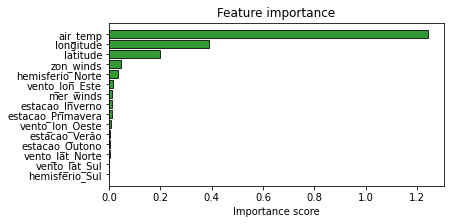

In [159]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp_clf.index, imp_clf['Importance'], height=0.8, facecolor='green', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Feature importance')
plt.gca().invert_yaxis()

- Justificação para importância da longitude

### Verificação da localização das boias

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

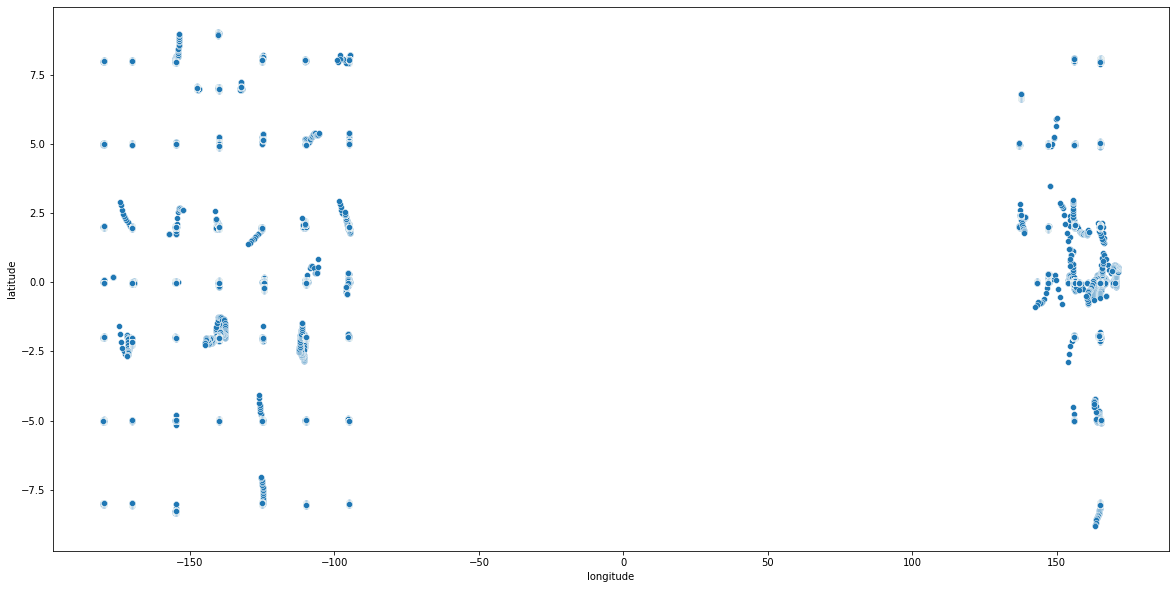

In [160]:
location = clean1[['latitude', 'longitude']]
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=location['longitude'], y=location['latitude'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


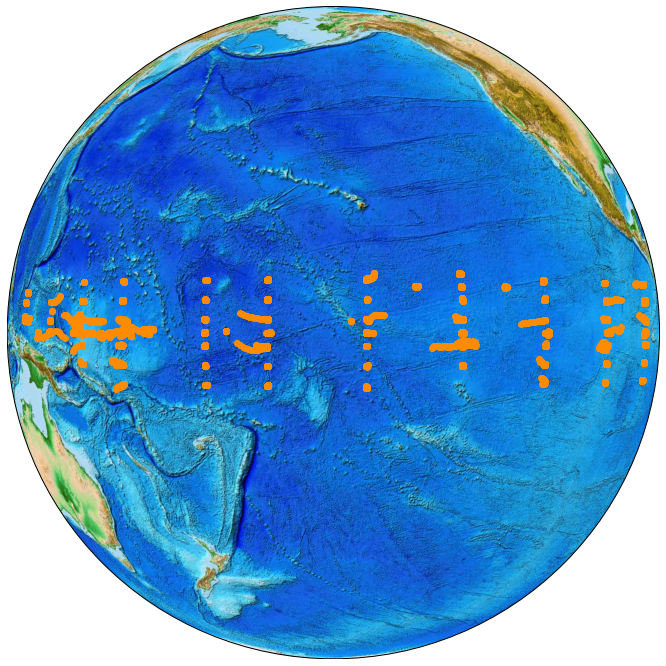

In [5]:
location = clean1[['latitude', 'longitude']]

plt.figure(figsize=(12, 12))
m = Basemap(projection='geos',
            resolution=None,lat_0=0,lon_0= -160)
m.etopo()

lon = list(location['longitude'])
lat = list(location['latitude'])

x, y = m(lon, lat)

m.scatter(x, y, marker='o',color='darkorange')

plt.show()

### Verificação da temperatura da superfície do mar consoante a longitude

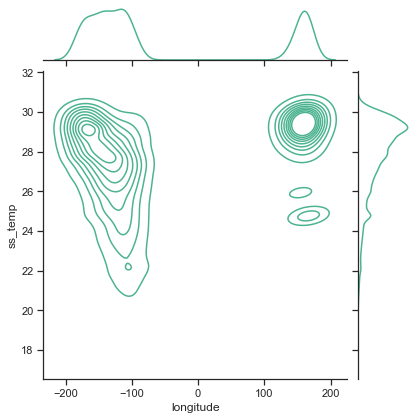

In [162]:
sns.set_theme(style="ticks")

sns.jointplot(x='longitude', y='ss_temp', kind="kde", color="#4CB391", data =clean1)

### Verificação da temperatura da superfície do mar consoante a latitude

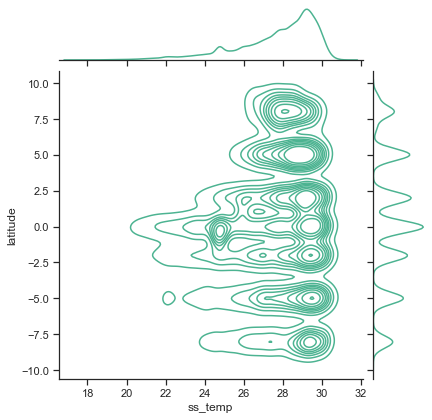

In [163]:
sns.set_theme(style="ticks")

sns.jointplot(x='ss_temp', y='latitude', kind="kde", color="#4CB391", data =clean1)

- Performance

In [164]:
from sklearn.metrics import mean_absolute_percentage_error 
mape = mean_absolute_percentage_error(y_pred=pred3, y_true= Y_test)
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Percentage Error: 0.012157595186722799


In [165]:
mse = mean_squared_error(y_pred=pred3, y_true= Y_test)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.2466584451137755


In [166]:
from sklearn.metrics import mean_absolute_error
meanAbErr = mean_absolute_error(y_pred=pred3, y_true= Y_test)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 0.3330525512925583


In [167]:
from sklearn.metrics import r2_score
R2 = r2_score(Y_test,pred3)
print('R - Squared:', R2)

R - Squared: 0.9427838706793213


- Validação

In [168]:
from sklearn.model_selection import cross_val_score
scores_dtr = cross_val_score(clf3, X_test1, Y_test, cv=10) # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Score: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [0.9249303  0.92434641 0.92244805 0.92174295 0.92903922 0.92859605
 0.92563679 0.92902234 0.92127199 0.92014653]
Score: 0.92 (+/- 0.01)


In [169]:
clf3 =pd.DataFrame({'Actual':Y_test, 'Predicted':pred3})
clf3

,Actual,Predicted
164657,25.84,25.850556
60537,25.83,26.819375
3222,23.39,23.323333
126536,29.26,27.660000
130780,28.63,29.193197
...,...,...
142327,25.44,25.646371
172555,29.07,29.119149
100741,26.67,24.997636
103501,22.67,23.077347


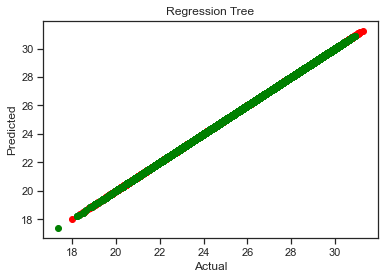

In [170]:
plt.scatter(clf3['Actual'],Y_test, color = 'red')
plt.scatter(clf3['Predicted'],pred3, color = 'green')
plt.title('Regression Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show() 

### 2º Modelo - Humidity

In [171]:
from sklearn import tree
clf4 = tree.DecisionTreeRegressor(max_depth = 15)
clf4 = clf4.fit(X_train2, Y_train)
pred4=clf4.predict(X_test2) 

- Importância variáveis

In [172]:
imp = rfpimp.importances(clf4, X_test2, Y_test)
imp

,Importance
Feature,
longitude,1.355538
latitude,0.689939
estacao_Verão,0.114719
hemisferio_Norte,0.114629
estacao_Outono,0.108504
zon_winds,0.092820
humidity,0.080176
estacao_Primavera,0.052962
mer_winds,0.051099


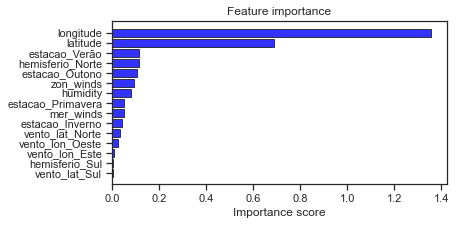

In [173]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='blue', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Feature importance')
plt.gca().invert_yaxis()

- Performance

In [174]:
from sklearn.metrics import mean_absolute_percentage_error 
mape = mean_absolute_percentage_error(y_pred=pred4, y_true= Y_test)
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Percentage Error: 0.018523624710892358


In [175]:
mse = mean_squared_error(y_pred=pred4, y_true= Y_test)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.6025901850005169


In [176]:
from sklearn.metrics import mean_absolute_error
meanAbErr = mean_absolute_error(y_pred=pred4, y_true= Y_test)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 0.4942260774199217


In [177]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,pred4)
print('R - Squared:', r2)

R - Squared: 0.8602201601633477


- Validação

In [178]:
from sklearn.model_selection import cross_val_score
scores_dtr = cross_val_score(clf4, X_test2, Y_test, cv=10) # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Score: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [0.83874042 0.83765026 0.84185221 0.81862528 0.82247551 0.84194966
 0.83760574 0.82881927 0.83641296 0.82745932]
Score: 0.83 (+/- 0.02)


In [179]:
clf4 =pd.DataFrame({'Actual':Y_test, 'Predicted':pred4})
clf4

,Actual,Predicted
164657,25.84,25.024510
60537,25.83,26.201818
3222,23.39,22.440000
126536,29.26,26.036429
130780,28.63,28.495000
...,...,...
142327,25.44,26.490092
172555,29.07,29.043158
100741,26.67,26.449167
103501,22.67,24.379140


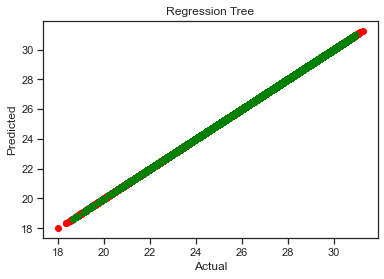

In [180]:
plt.scatter(clf4['Actual'],Y_test, color = 'red')
plt.scatter(clf4['Predicted'],pred4, color = 'green')
plt.title('Regression Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show() 

# Random Forest

1. Air temp

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)
grid_search.fit(X_train1,Y_train)
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_

RandomForestRegressor(max_depth=25)

2. Humidity

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)
grid_search.fit(X_train2,Y_train)
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_

RandomForestRegressor(max_depth=25)

### 1º Modelo - Air temp

In [181]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 25,oob_score=True)
rfr = rfr.fit(X_train1, Y_train)
pred_rfr =rfr.predict(X_test1) 

- Importância variáveis

In [182]:
#!pip install rfpimp

In [183]:
import rfpimp
imp = rfpimp.importances(rfr, X_test1, Y_test)
imp

,Importance
Feature,
air_temp,1.185427
longitude,0.269277
latitude,0.142938
zon_winds,0.032964
estacao_Inverno,0.008812
mer_winds,0.008605
hemisferio_Sul,0.006981
estacao_Primavera,0.006303
hemisferio_Norte,0.002881


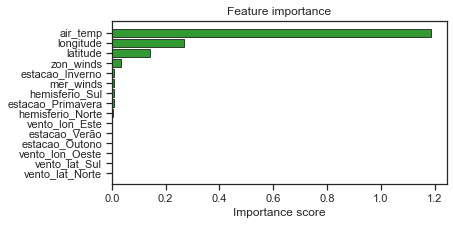

In [184]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='green', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Feature importance')
plt.gca().invert_yaxis()

- Performance

In [185]:
from sklearn.metrics import mean_absolute_percentage_error 
mape = mean_absolute_percentage_error(pred_rfr, Y_test)
print('Mean Absolute Error:', mape)

Mean Absolute Error: 0.010004511834186512


In [186]:
mse = mean_squared_error(pred_rfr, Y_test)
print('Mean Squared Error:', meanAbErr)

Mean Squared Error: 0.4942260774199217


In [187]:
from sklearn.metrics import mean_absolute_error
meanAbErr = mean_absolute_error(y_pred=pred_rfr, y_true= Y_test)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 0.2740766610593676


In [188]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,pred_rfr)
print('R - Squared:',r2)

R - Squared: 0.9632668018307826


- Validação

In [189]:
print(rfr.oob_score_)

0.9625740431254084


In [190]:
rfr1 =pd.DataFrame({'Actual':Y_test, 'Predicted':pred_rfr})
rfr1

,Actual,Predicted
164657,25.84,25.761476
60537,25.83,26.954950
3222,23.39,23.470484
126536,29.26,27.885776
130780,28.63,28.517965
...,...,...
142327,25.44,25.574192
172555,29.07,29.231859
100741,26.67,24.687117
103501,22.67,22.994202


### 2º Modelo - Humidity 

In [191]:
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor(max_depth = 20,oob_score=True)
rfr2 = rfr2.fit(X_train2, Y_train)
pred_rfr2 =rfr2.predict(X_test2) 

- Importância

In [192]:
import rfpimp
imp2 = rfpimp.importances(rfr2, X_test2, Y_test)
imp2

,Importance
Feature,
longitude,1.327246
latitude,0.566043
estacao_Outono,0.126124
estacao_Verão,0.105183
humidity,0.087382
zon_winds,0.070814
estacao_Primavera,0.037038
mer_winds,0.034974
estacao_Inverno,0.028682


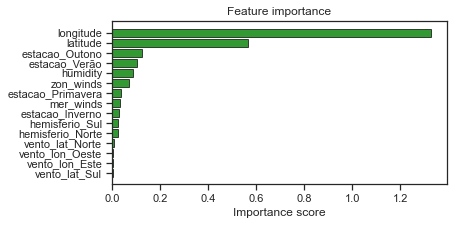

In [193]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp2.index, imp2['Importance'], height=0.8, facecolor='green', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Feature importance')
plt.gca().invert_yaxis()

- Performance

In [194]:
from sklearn.metrics import mean_absolute_percentage_error 
mape = mean_absolute_percentage_error(pred_rfr2, Y_test)
print('Mean Absolute Error:', mape)

Mean Absolute Error: 0.014781791492563784


In [195]:
mse = mean_squared_error(pred_rfr2, Y_test)
print('Mean Absolute Error:', mse)

Mean Absolute Error: 0.36903929458263546


In [196]:
from sklearn.metrics import mean_absolute_error
meanAbErr = mean_absolute_error(y_pred=pred_rfr2, y_true= Y_test)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 0.39655490735409676


In [197]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,pred_rfr2)
print('R - Squared:', r2)

R - Squared: 0.9143957953942651


- Validação

In [198]:
print(rfr2.oob_score_)

0.9151454589550687


In [199]:
rfr2 =pd.DataFrame({'Actual':Y_test, 'Predicted':pred_rfr2})
rfr2

,Actual,Predicted
164657,25.84,24.596958
60537,25.83,26.400700
3222,23.39,23.640820
126536,29.26,26.351877
130780,28.63,28.486618
...,...,...
142327,25.44,26.512067
172555,29.07,29.148333
100741,26.67,25.979071
103501,22.67,23.386843


# Conclusão

- Verificar Distribuição da temperatura da superfície do mar ao longo dos anos consoante a estação do ano

In [208]:
grouped = clean2.groupby(['year','estacao'])['ss_temp'].mean().reset_index()
grouped.head()

,year,estacao,ss_temp
0,80,Outono,22.644239
1,80,Verão,23.303784
2,81,Inverno,21.987538
3,81,Outono,22.798800
4,81,Primavera,23.933400


Text(0.5, 1.0, 'Distribuição da temperatura da superfície ao longo dos anos por estação do ano ')

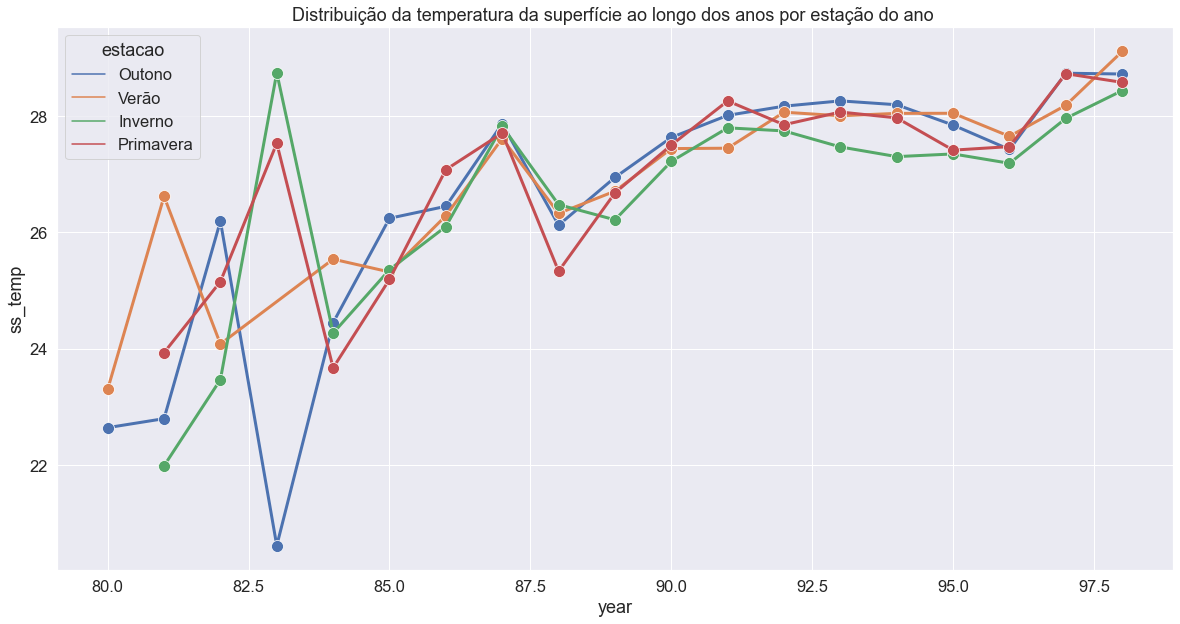

In [209]:
sns.set(
    font_scale=1.5,
    rc={'figure.figsize':(20,10)}
)

ax = sns.lineplot(
    x='year', 
    y='ss_temp', 
    hue='estacao',
    marker="o",  
    markersize=12,
    lw=3,
    data= grouped
)

ax.set_title('Distribuição da temperatura da superfície ao longo dos anos por estação do ano ')

- Verificar Distribuição da temperatura da superfície do mar ao longo dos anos consoante a estação do ano

In [210]:
grouped2 = clean2.groupby(['year','vento_lon'])['zon_winds'].mean().reset_index()
grouped2.head()

,year,vento_lon,zon_winds
0,80,Oeste,4.174096
1,81,Este,0.704167
2,81,Oeste,3.466603
3,82,Este,1.112500
4,82,Oeste,2.347619


Text(0.5, 1.0, 'Distribuição da velocidade dos ventos zonais, consoante a sua direção por ano')

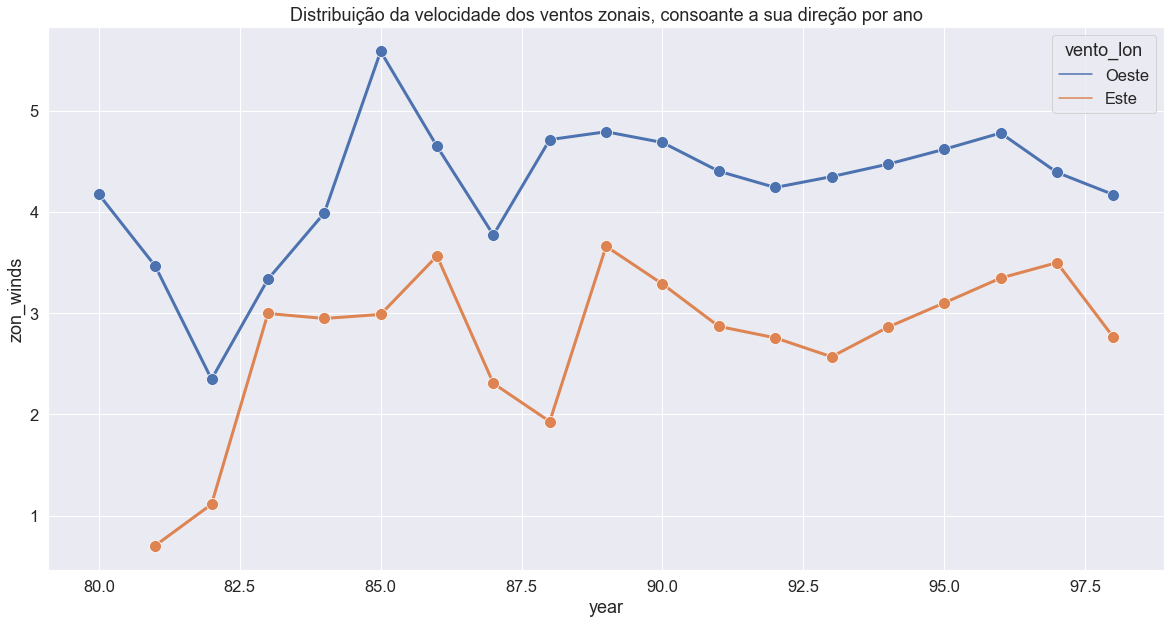

In [211]:
sns.set(
    font_scale=1.5,
    rc={'figure.figsize':(20,10)}
)

ax = sns.lineplot(
    x='year', 
    y='zon_winds', 
    hue= 'vento_lon',
    marker="o",  
    markersize=12,
    lw=3,
    data= grouped2
)

ax.set_title('Distribuição da velocidade dos ventos zonais, consoante a sua direção por ano')

- Evolução da temperatura da superfície do mar ao longo dos anos

<AxesSubplot:xlabel='year', ylabel='ss_temp'>

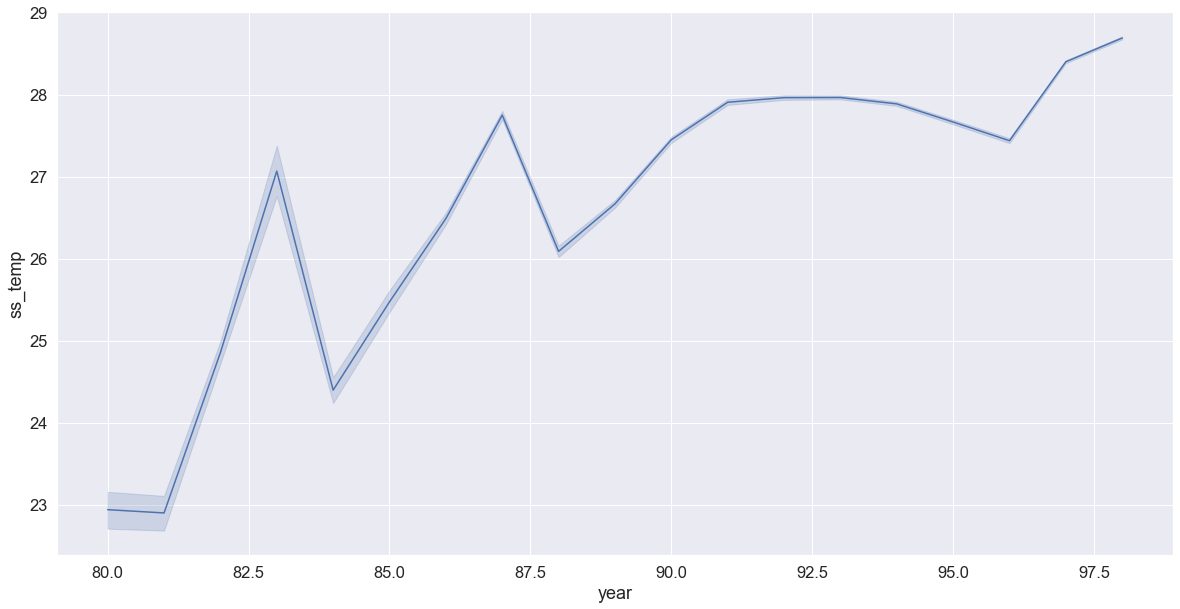

In [212]:
sns.lineplot(data=clean2, x="year", y="ss_temp")